Load The Dataset

In [2]:
import pandas as pd

data = pd.read_csv('/winequality-red.csv', sep=';')

In [3]:
print(data.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

Check for missing values

In [4]:
print(data.isnull().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


Exploratory Data Analysis

compute summary statistics of the data

In [5]:
print(data.describe())

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000         

Visualizing Distributions

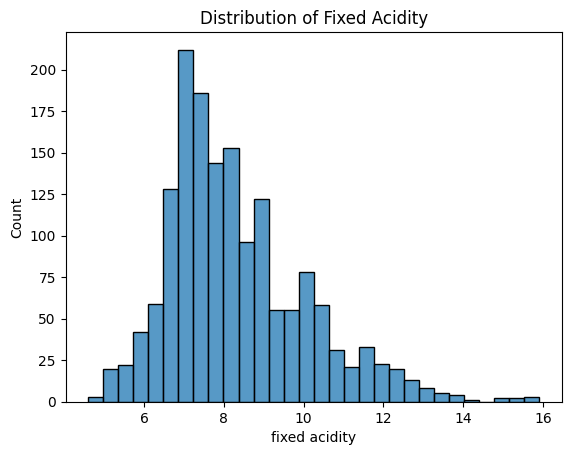

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(data['fixed acidity'], bins=30)
plt.title('Distribution of Fixed Acidity')
plt.show()

Visualizing Relationships

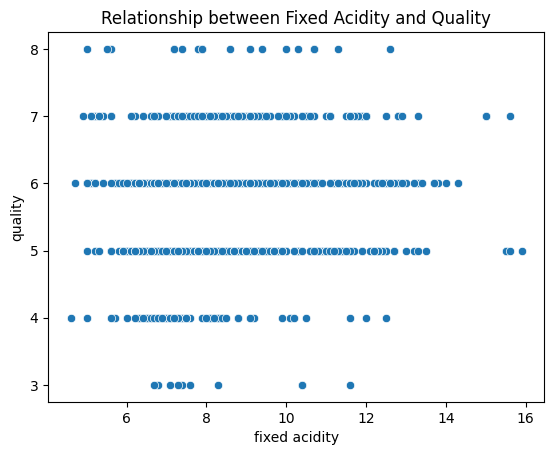

In [7]:
sns.scatterplot(data=data, x='fixed acidity', y='quality')
plt.title('Relationship between Fixed Acidity and Quality')
plt.show()

Visualizing Correlation Matrix

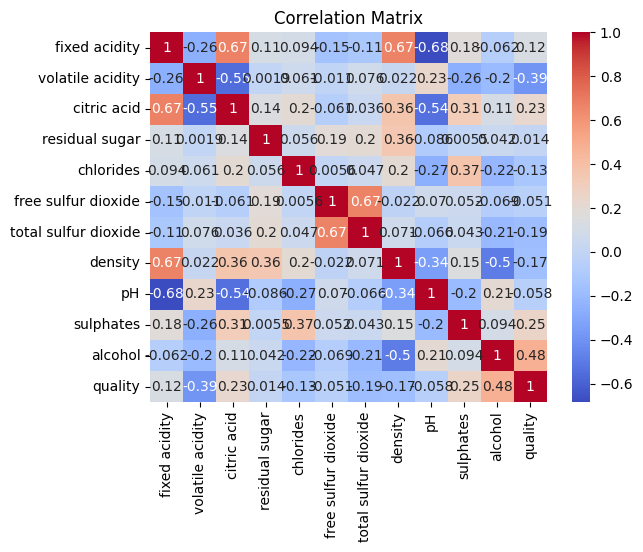

In [8]:
corr = data.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Visualizing Class Distribution

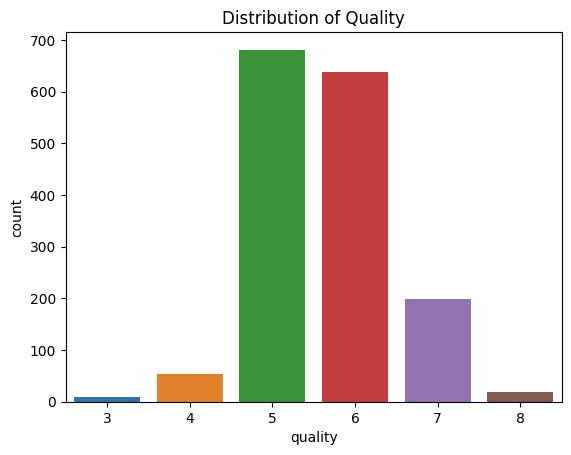

In [9]:
sns.countplot(data=data, x='quality')
plt.title('Distribution of Quality')
plt.show()

Feature Scaling

In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(data.drop('quality', axis=1))

Feature Transformation

In [11]:
import numpy as np

data['log_fixed_acidity'] = np.log(data['fixed acidity'])

Feature Selection

In [13]:
from sklearn.feature_selection import SelectKBest, f_classif

selector = SelectKBest(score_func=f_classif, k=10)
selected_data = selector.fit_transform(data.drop('quality', axis=1), data['quality'])

Feature Creation



In [14]:
data['acid_ratio'] = data['fixed acidity'] / data['citric acid']

Split the data into training and testing sets

In [27]:
from sklearn.model_selection import train_test_split

# Define the features (X) and the target variable (y)
X = data.drop('quality', axis=1)
y = data['quality']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Train a Random Forest regressor

In [34]:
print(np.max(X_train))


fixed acidity            15.900000
volatile acidity          1.580000
citric acid               1.000000
residual sugar           15.500000
chlorides                 0.611000
free sulfur dioxide      68.000000
total sulfur dioxide    289.000000
density                   1.003690
pH                        4.010000
sulphates                 2.000000
alcohol                  14.900000
log_fixed_acidity         2.766319
acid_ratio              830.000000
dtype: float64


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)


In [38]:
# Replace infinity values with NaN in training data
X_train.replace([np.inf, -np.inf], np.nan, inplace=True)

# Impute NaN values with column mean in training data
X_train.fillna(X_train.mean(), inplace=True)

# Replace infinity values with NaN in testing data
X_test.replace([np.inf, -np.inf], np.nan, inplace=True)

# Impute NaN values with column mean in testing data
X_test.fillna(X_test.mean(), inplace=True)


In [39]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
import numpy as np

print(np.any(np.isinf(X)))

# Instantiate the model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)
print(np.any(np.isinf(X), axis=0))

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error:', mae)


True
fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
log_fixed_acidity       False
acid_ratio               True
dtype: bool
Mean Absolute Error: 0.42415625000000007


Tuning the hyperparameters

In [40]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Instantiate the grid search
grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5, scoring='neg_mean_absolute_error')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best parameters
print('Best Parameters:', grid_search.best_params_)

Best Parameters: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}


Valuate the performance (MSE)

In [41]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

Mean Squared Error: 0.3045884375


Save the Model

In [45]:
import joblib

# Save the model to a file
joblib.dump(model, 'wine_quality_model.pkl')


['wine_quality_model.pkl']